In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/강의/ML/fs.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,class
0,5.409875,22.927250,-9.872094,1.978044,8.272287,-9.615210,-15.926246,0.717284,-4.492205,0.340553,...,15.299997,36.669443,36.786639,3.332443,-17.879987,15.926380,1.725497,23.504194,9.792352,N
1,4.126545,21.904110,-15.023121,-18.006157,9.286373,6.454027,-4.575243,-2.577147,-5.008726,0.675012,...,0.394683,19.632161,24.693643,15.046554,-10.080864,16.203368,3.024984,4.843633,11.843677,N
2,4.403986,22.988278,-8.681490,-13.313750,9.630441,-11.460537,-11.477227,-2.379079,-0.443103,1.215022,...,-0.333559,30.368623,29.061423,7.267859,-10.255625,16.593458,0.747861,23.694985,9.882828,N
3,3.935644,7.067716,-9.627175,-14.915711,13.804277,-5.872124,-12.626840,0.243053,-2.340807,0.769241,...,3.227280,20.739104,21.363254,-1.755453,-16.364006,17.042786,1.920244,0.600049,10.090662,N
4,4.210392,21.874668,-14.244560,-21.684349,8.088974,6.543087,-1.746851,-0.956112,-2.735903,1.184741,...,2.384255,25.897681,22.521317,0.198194,-10.711563,21.212732,2.226788,13.541937,7.420688,N


In [3]:
#convert labels to numbers
data.loc[data['class'] == "P", "class"] = 1
data.loc[data['class'] == "N", "class"] = -1

X = data.iloc[:,:-1].values
y = data.iloc[:,30].values
X.shape

(200, 30)

In [4]:
#SelectKBest(score function=f_classif, k=110)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_KBest = SelectKBest(f_classif, k=10).fit(X, y)
X_K = X_KBest.transform(X)
#print(X_K)

In [5]:
#SelectFromModel(estimator=logisticregression)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
X_S = selector.transform(X)
print(selector.estimator_.coef_)
print(selector.threshold_)
#print(selector.get_support())
#print(selector.transform(X))
#print(X_S)

[[-2.90800091 -0.0459404  -0.03852543  0.03903388  0.02929327  0.13338785
  -0.05378794  0.10591863  0.0988114  -0.39640194 -1.02024089  0.06200964
  -0.08303811  0.07540627 -0.13658912  0.03987002  0.54302575  0.01916199
  -0.04311926  0.01841963 -0.06715817  0.03206077 -0.04667232  0.10146356
   0.04172387  0.00794671 -0.01111146  0.12954709  0.04451738 -0.00830897]]
0.2126830876131716


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
#models to measure feature selection's effect

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier()

from sklearn.svm import SVC
svm = SVC(kernel='linear')

Text(0, 0.5, 'f1-score')

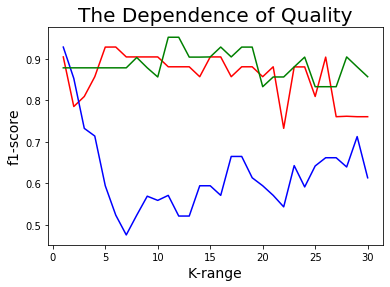

<Figure size 864x432 with 0 Axes>

In [7]:
#Plot according to K of KBest

import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

ax = plt.subplot()

tree_score_list = []
kneigh_score_list = []
svm_score_list = []

for i in range(1,31):
    X_KBest = SelectKBest(f_classif, k=i).fit(X, y)
    X_K = X_KBest.transform(X)
    X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(X_K, y, test_size=0.21, random_state=42)
    tree.fit(X_train_K,y_train_K)
    kneigh.fit(X_train_K,y_train_K)
    svm.fit(X_train_K,y_train_K)
    pred_tree = tree.predict(X_test_K)
    pred_kneigh = kneigh.predict(X_test_K)
    pred_svm = svm.predict(X_test_K)
    tree_score = f1_score(y_test_K, pred_tree, average = 'weighted')
    kneigh_score = f1_score(y_test_K, pred_kneigh, average = 'weighted')
    svm_score = f1_score(y_test_K, pred_svm, average = 'weighted')
    tree_score_list.append(tree_score)
    kneigh_score_list.append(kneigh_score)
    svm_score_list.append(svm_score)
    
fig = plt.figure(figsize=(12, 6))
#plot tree
ax.plot(range(1,31), tree_score_list, color='red')
#plot kneigh
ax.plot(range(1,31), kneigh_score_list, color='blue')
#plot svm
ax.plot(range(1,31), svm_score_list, color='green')

ax.set_title('The Dependence of Quality', fontsize = 20)
ax.set_xlabel('K-range', fontsize = 14)
ax.set_ylabel('f1-score', fontsize = 14)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-pa

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-pa

Text(0, 0.5, 'f1-score')

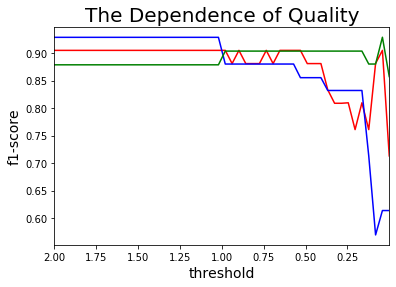

<Figure size 864x432 with 0 Axes>

In [8]:
#Plot according to threshold of Selectfrommodel

import sklearn.metrics as metrics
from sklearn.metrics import f1_score

ax = plt.subplot()

tree_score_list = []
kneigh_score_list = []
svm_score_list = []

for i in np.linspace(0.0001,2):
    selector = SelectFromModel(estimator=LogisticRegression(), threshold = i).fit(X, y)
    X_S = selector.transform(X)
    X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y, test_size=0.21, random_state=42)
    tree.fit(X_train_S,y_train_S)
    kneigh.fit(X_train_S,y_train_S)
    svm.fit(X_train_S,y_train_S)
    pred_tree = tree.predict(X_test_S)
    pred_kneigh = kneigh.predict(X_test_S)
    pred_svm = svm.predict(X_test_S)

    
    tree_score = f1_score(y_test_S, pred_tree.round(), average = 'weighted')
    kneigh_score = f1_score(y_test_S, pred_kneigh.round(), average = 'weighted')
    svm_score = f1_score(y_test_S, pred_svm.round(), average = 'weighted')
    
    
    tree_score_list.append(tree_score)
    kneigh_score_list.append(kneigh_score)
    svm_score_list.append(svm_score)
    
fig = plt.figure(figsize=(12, 6))
#plot tree
ax.plot(np.linspace(0.0001,2), tree_score_list, color='red')
#plot kneigh
ax.plot(np.linspace(0.0001,2), kneigh_score_list, color='blue')
#plot svm
ax.plot(np.linspace(0.0001,2), svm_score_list, color='green')
ax.set_xlim([2,0.0001])
ax.set_title('The Dependence of Quality', fontsize = 20)
ax.set_xlabel('threshold', fontsize = 14)
ax.set_ylabel('f1-score', fontsize = 14)
    